In [8]:
import h5py
import scipy.io as io
from PIL import Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from tqdm import tqdm

from matplotlib import cm as CM
#from image import *
#%reload_ext autoreload        <------------— comment out 
#%autoreload 0                 <------------— comment out
%matplotlib inline

In [2]:
def gaussian_filter_density(gt):
    #Generates a density map using Gaussian filter transformation
    
    density = np.zeros(gt.shape, dtype=np.float32)
    
    gt_count = np.count_nonzero(gt)
    
    if gt_count == 0:
        return density

    # FInd out the K nearest neighbours using a KDTree
    
    pts = np.array(list(zip(np.nonzero(gt)[1].ravel(), np.nonzero(gt)[0].ravel())))
    leafsize = 2048
    
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    
    # query kdtree
    distances, locations = tree.query(pts, k=4)

        
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        
        #Convolve with the gaussian filter
        
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    
    return density

In [3]:
root = os.path.join(os.getcwd(),'ShanghaiTech')
print(root)

/home/rana/mypython/crowd_counting_analysis/keras_solution/CSRNet_keras_master/CSRNet_keras_master/ShanghaiTech


In [4]:
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_B_train,part_B_test]

In [5]:
# List of all image paths

img_paths = []
for path in tqdm(path_sets):
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
print(len(img_paths))

100%|██████████| 2/2 [00:00<00:00, 232.38it/s]

716


In [6]:

i = 0
for img_path in tqdm(img_paths):
        
    
    # Load sparse matrix
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    
    #Read image
    img= plt.imread(img_path)
    
    # Create a zero matrix of image size
    #k = np.zeros((img.shape[0],img.shape[1]))
    
    #gt = mat["image_info"][0,0][0,0][0]
    
    #Generate hot encoded matrix of sparse matrix
    #for i in range(0,len(gt)):
    #    if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
    #        k[int(gt[i][1]),int(gt[i][0])]=1
    
    # generate density map
    #k = gaussian_filter_density(k)
    
    # File path to save density map
    file_path = img_path.replace('.jpg','.h5').replace('images','ground_truth')
    
    #with h5py.File(file_path, 'w') as hf:
    #        hf['density'] = k
    


100%|██████████| 716/716 [00:09<00:00, 78.50it/s]


In [26]:
file_path = os.path.join(os.getcwd(),img_paths[22].replace('.jpg','.h5').replace('images','ground') )
print(file_path)

/home/rana/mypython/crowd counting analysis/keras_solution/CSRNet-keras-master (1)/CSRNet-keras-master/ShanghaiTech/part_A/train_data/ground/IMG_264.h5


Sum =  208.18813
/home/rana/mypython/crowd_counting_analysis/keras_solution/CSRNet_keras_master/CSRNet_keras_master/ShanghaiTech/part_B/test_data/ground_truth/IMG_234.h5


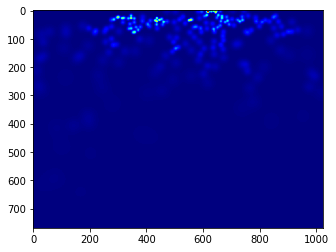

In [11]:
#Sample Ground Truth
gt_file = h5py.File(file_path,'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)
print("Sum = " ,np.sum(groundtruth))
print(file_path)

/home/rana/mypython/crowd_counting_analysis/keras_solution/CSRNet_keras_master/CSRNet_keras_master/ShanghaiTech/part_B/test_data/ground_truth/IMG_234.h5


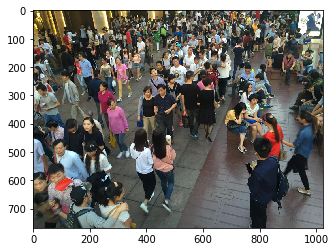

In [12]:
# Image corresponding to the ground truth
img = Image.open(file_path.replace('.h5','.jpg').replace('ground_truth','images'))
plt.imshow(img)
print(file_path)

In [14]:
import h5py
import numpy as np

arr = np.random.randn(1000)

with h5py.File('/home/rana/mypython/crowd_counting_analysis/keras_solution/CSRNet_keras_master/CSRNet_keras_master/ShanghaiTech/part_A/train_data/ground/IMG_183.h5', 'w') as f:
    dset = f.create_dataset("default", data=arr)

OSError: Unable to create file (unable to open file: name = '/home/rana/mypython/crowd_counting_analysis/keras_solution/CSRNet_keras_master/CSRNet_keras_master/ShanghaiTech/part_A/train_data/ground/IMG_183.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [24]:
os.getcwd()

'/home/rana/mypython/crowd counting analysis/keras_solution/CSRNet-keras-master (1)/CSRNet-keras-master'

In [29]:
len(gt)

212

In [32]:
print(k)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
    pts = np.array(list(zip(np.nonzero(k)[1].ravel(), np.nonzero(k)[0].ravel())))


In [35]:
pts.shape

(689980, 2)

In [38]:
i=int(0)
for pt in pts:
    print(pt)
    i+=1
    if i==50:
        break

[357   0]
[358   0]
[359   0]
[360   0]
[361   0]
[362   0]
[363   0]
[364   0]
[365   0]
[366   0]
[367   0]
[368   0]
[369   0]
[370   0]
[371   0]
[372   0]
[373   0]
[374   0]
[375   0]
[376   0]
[377   0]
[378   0]
[379   0]
[380   0]
[381   0]
[382   0]
[383   0]
[384   0]
[385   0]
[386   0]
[387   0]
[388   0]
[389   0]
[390   0]
[391   0]
[392   0]
[393   0]
[394   0]
[395   0]
[396   0]
[397   0]
[398   0]
[399   0]
[400   0]
[401   0]
[402   0]
[403   0]
[404   0]
[405   0]
[406   0]
